# Imports

In [106]:
import pandas as pd
import os
import numpy as np
import copy
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.8f}'.format)

# Reading the data

In [109]:
df = pd.read_csv('preprocessed_csv.csv')

In [110]:
df.head()

,destinationport,flowduration,totalfwdpackets,totalbackwardpackets,totallengthoffwdpackets,totallengthofbwdpackets,fwdpacketlengthmax,fwdpacketlengthmin,fwdpacketlengthmean,fwdpacketlengthstd,bwdpacketlengthmax,bwdpacketlengthmin,bwdpacketlengthmean,bwdpacketlengthstd,flowbytes/s,flowpackets/s,flowiatmean,flowiatstd,flowiatmax,flowiatmin,fwdiattotal,fwdiatmean,fwdiatstd,fwdiatmax,fwdiatmin,bwdiattotal,bwdiatmean,bwdiatstd,bwdiatmax,bwdiatmin,fwdpshflags,fwdheaderlength,bwdheaderlength,fwdpackets/s,bwdpackets/s,minpacketlength,maxpacketlength,packetlengthmean,packetlengthstd,packetlengthvariance,finflagcount,synflagcount,rstflagcount,pshflagcount,ackflagcount,urgflagcount,eceflagcount,down/upratio,averagepacketsize,avgfwdsegmentsize,avgbwdsegmentsize,fwdheaderlength.1,subflowfwdpackets,subflowfwdbytes,subflowbwdpackets,subflowbwdbytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,activemean,activestd,activemax,activemin,idlemean,idlestd,idlemax,idlemin,label
0,54865,3,2,0,12,0,6,6,6.00000000,0.00000000,0,0,0.00000000,0.00000000,4000000.00000000,666666.70000000,3.00000000,0.00000000,3,3,3,3.00000000,0.00000000,3,3,0,0.00000000,0.00000000,0,0,0,40,0,666666.70000000,0.00000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,0,0,0,9.00000000,6.00000000,0.00000000,40,2,12,0,0,33,-1,1,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,110091.74000000,18348.62300000,109.00000000,0.00000000,109,109,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,9174.31200000,9174.31200000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,29,256,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,230769.23000000,38461.54000000,52.00000000,0.00000000,52,52,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,19230.77000000,19230.77000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,29,256,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,352941.20000000,58823.53000000,34.00000000,0.00000000,34,34,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,29411.76600000,29411.76600000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,31,329,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.00000000,0.00000000,0,0,0.00000000,0.00000000,4000000.00000000,666666.70000000,3.00000000,0.00000000,3,3,3,3.00000000,0.00000000,3,3,0,0.00000000,0.00000000,0,0,0,40,0,666666.70000000,0.00000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,0,0,0,9.00000000,6.00000000,0.00000000,40,2,12,0,0,32,-1,1,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,BENIGN


In [111]:
df.label.value_counts()

DDoS      128025
BENIGN     97686
Name: label, dtype: int64

In [112]:
# Let's start with attack detection and separation from attack and non-attack
df.loc[df['label'] == 'BENIGN', 'label'] = 0
df.loc[df['label'] != 0, 'label'] = 1
df['label'] = df['label'].astype(int)

In [113]:
df.label.value_counts()

1    128025
0     97686
Name: label, dtype: int64

In [114]:
df.head()

,destinationport,flowduration,totalfwdpackets,totalbackwardpackets,totallengthoffwdpackets,totallengthofbwdpackets,fwdpacketlengthmax,fwdpacketlengthmin,fwdpacketlengthmean,fwdpacketlengthstd,bwdpacketlengthmax,bwdpacketlengthmin,bwdpacketlengthmean,bwdpacketlengthstd,flowbytes/s,flowpackets/s,flowiatmean,flowiatstd,flowiatmax,flowiatmin,fwdiattotal,fwdiatmean,fwdiatstd,fwdiatmax,fwdiatmin,bwdiattotal,bwdiatmean,bwdiatstd,bwdiatmax,bwdiatmin,fwdpshflags,fwdheaderlength,bwdheaderlength,fwdpackets/s,bwdpackets/s,minpacketlength,maxpacketlength,packetlengthmean,packetlengthstd,packetlengthvariance,finflagcount,synflagcount,rstflagcount,pshflagcount,ackflagcount,urgflagcount,eceflagcount,down/upratio,averagepacketsize,avgfwdsegmentsize,avgbwdsegmentsize,fwdheaderlength.1,subflowfwdpackets,subflowfwdbytes,subflowbwdpackets,subflowbwdbytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,activemean,activestd,activemax,activemin,idlemean,idlestd,idlemax,idlemin,label
0,54865,3,2,0,12,0,6,6,6.00000000,0.00000000,0,0,0.00000000,0.00000000,4000000.00000000,666666.70000000,3.00000000,0.00000000,3,3,3,3.00000000,0.00000000,3,3,0,0.00000000,0.00000000,0,0,0,40,0,666666.70000000,0.00000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,0,0,0,9.00000000,6.00000000,0.00000000,40,2,12,0,0,33,-1,1,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,0
1,55054,109,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,110091.74000000,18348.62300000,109.00000000,0.00000000,109,109,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,9174.31200000,9174.31200000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,29,256,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,0
2,55055,52,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,230769.23000000,38461.54000000,52.00000000,0.00000000,52,52,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,19230.77000000,19230.77000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,29,256,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,0
3,46236,34,1,1,6,6,6,6,6.00000000,0.00000000,6,6,6.00000000,0.00000000,352941.20000000,58823.53000000,34.00000000,0.00000000,34,34,0,0.00000000,0.00000000,0,0,0,0.00000000,0.00000000,0,0,0,20,20,29411.76600000,29411.76600000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,1,0,1,9.00000000,6.00000000,6.00000000,20,1,6,1,6,31,329,0,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,0
4,54863,3,2,0,12,0,6,6,6.00000000,0.00000000,0,0,0.00000000,0.00000000,4000000.00000000,666666.70000000,3.00000000,0.00000000,3,3,3,3.00000000,0.00000000,3,3,0,0.00000000,0.00000000,0,0,0,40,0,666666.70000000,0.00000000,6,6,6.00000000,0.00000000,0.00000000,0,0,0,0,1,0,0,0,9.00000000,6.00000000,0.00000000,40,2,12,0,0,32,-1,1,20,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0,0,0


# Feature Selection

In [116]:
# Add a random variable
np.random.seed(42)  # For reproducibility
df['random_var'] = np.random.rand(len(df))

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Train a Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, class_weight='balanced')
RFmodel = RF.fit(X, y)

# Get feature importances
importances = RFmodel.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

# Select features with importance above the importance of the random variable
random_var_importance = importance_df[importance_df['Feature'] == 'random_var']['Importance'].values[0]
important_features = importance_df[importance_df['Importance'] > random_var_importance]['Feature']

# Create a new DataFrame with the selected features
df_reduced = df[important_features]

# Add the label column back to the reduced DataFrame
df_reduced['label'] = df['label']

Feature Importances:
                   Feature  Importance
6       fwdpacketlengthmax  0.07953939
58        act_data_pkt_fwd  0.07389387
49       avgfwdsegmentsize  0.06335010
8      fwdpacketlengthmean  0.06248323
56  init_win_bytes_forward  0.06177228
..                     ...         ...
61               activestd  0.00000396
30             fwdpshflags  0.00000226
41            synflagcount  0.00000107
42            rstflagcount  0.00000000
46            eceflagcount  0.00000000

[69 rows x 2 columns]


C:\Users\romanrosh\AppData\Local\Temp\ipykernel_35460\2728357906.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['label'] = df['label']


In [117]:
df = df_reduced.copy()

In [118]:
df.shape

(225711, 58)

In [119]:
# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Set a threshold for high correlation
threshold = 0.9

# Create a mask to ignore self-correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
tri_upper = correlation_matrix.where(mask)

# Find pairs of features with high correlation
highly_correlated_pairs = [
    (col, idx) for col in tri_upper.columns for idx in tri_upper.index if tri_upper.loc[idx, col] > threshold and col != idx
]

In [120]:
# Display highly correlated pairs
print("Highly correlated pairs of features:")
highly_correlated_pairs

Highly correlated pairs of features:


[('avgfwdsegmentsize', 'fwdpacketlengthmax'),
 ('fwdpacketlengthmean', 'fwdpacketlengthmax'),
 ('fwdpacketlengthmean', 'avgfwdsegmentsize'),
 ('totallengthoffwdpackets', 'subflowfwdbytes'),
 ('bwdpacketlengthmean', 'bwdpacketlengthstd'),
 ('subflowfwdpackets', 'totalfwdpackets'),
 ('bwdpacketlengthmax', 'bwdpacketlengthstd'),
 ('bwdpacketlengthmax', 'bwdpacketlengthmean'),
 ('fwdiatmax', 'fwdiatstd'),
 ('avgbwdsegmentsize', 'bwdpacketlengthstd'),
 ('avgbwdsegmentsize', 'bwdpacketlengthmean'),
 ('avgbwdsegmentsize', 'bwdpacketlengthmax'),
 ('fwdiattotal', 'fwdiatmax'),
 ('fwdheaderlength', 'totalfwdpackets'),
 ('fwdheaderlength', 'subflowfwdpackets'),
 ('bwdheaderlength', 'totalfwdpackets'),
 ('bwdheaderlength', 'subflowfwdpackets'),
 ('bwdheaderlength', 'fwdheaderlength'),
 ('subflowbwdbytes', 'totalfwdpackets'),
 ('subflowbwdbytes', 'subflowfwdpackets'),
 ('subflowbwdbytes', 'fwdheaderlength'),
 ('subflowbwdbytes', 'bwdheaderlength'),
 ('subflowbwdpackets', 'totalfwdpackets'),
 ('subf

In [121]:
# Example: If you want to remove one of each pair of highly correlated features
to_drop = set()
for col, idx in highly_correlated_pairs:
    to_drop.add(idx)
to_drop

{'averagepacketsize',
 'avgfwdsegmentsize',
 'bwdheaderlength',
 'bwdiatmax',
 'bwdpacketlengthmax',
 'bwdpacketlengthmean',
 'bwdpacketlengthstd',
 'flowduration',
 'flowiatmax',
 'flowiatstd',
 'fwdheaderlength',
 'fwdheaderlength.1',
 'fwdiatmax',
 'fwdiatmean',
 'fwdiatstd',
 'fwdiattotal',
 'fwdpacketlengthmax',
 'fwdpacketlengthmean',
 'fwdpackets/s',
 'idlemean',
 'packetlengthmean',
 'packetlengthstd',
 'packetlengthvariance',
 'subflowbwdbytes',
 'subflowbwdpackets',
 'subflowfwdbytes',
 'subflowfwdpackets',
 'totalbackwardpackets',
 'totalfwdpackets'}

In [122]:
# Drop the highly correlated features
df_reduced = df.drop(columns=to_drop)

In [123]:
# Display the reduced DataFrame
print("Reduced DataFrame after removing highly correlated features:")
df_reduced.head()

Reduced DataFrame after removing highly correlated features:


,act_data_pkt_fwd,init_win_bytes_forward,totallengthoffwdpackets,avgbwdsegmentsize,destinationport,bwdiattotal,fwdpacketlengthstd,init_win_bytes_backward,totallengthofbwdpackets,bwdpacketlengthmin,fwdiatmin,fwdpacketlengthmin,bwdpackets/s,maxpacketlength,urgflagcount,bwdiatmean,minpacketlength,bwdiatstd,down/upratio,flowiatmin,min_seg_size_forward,flowpackets/s,flowbytes/s,flowiatmean,finflagcount,pshflagcount,idlemin,idlemax,label
0,1,33,12,0.00000000,54865,0,0.00000000,-1,0,0,3,6,0.00000000,6,0,0.00000000,6,0.00000000,0,3,20,666666.70000000,4000000.00000000,3.00000000,0,0,0,0,0
1,0,29,6,6.00000000,55054,0,0.00000000,256,6,6,0,6,9174.31200000,6,1,0.00000000,6,0.00000000,1,109,20,18348.62300000,110091.74000000,109.00000000,0,0,0,0,0
2,0,29,6,6.00000000,55055,0,0.00000000,256,6,6,0,6,19230.77000000,6,1,0.00000000,6,0.00000000,1,52,20,38461.54000000,230769.23000000,52.00000000,0,0,0,0,0
3,0,31,6,6.00000000,46236,0,0.00000000,329,6,6,0,6,29411.76600000,6,1,0.00000000,6,0.00000000,1,34,20,58823.53000000,352941.20000000,34.00000000,0,0,0,0,0
4,1,32,12,0.00000000,54863,0,0.00000000,-1,0,0,3,6,0.00000000,6,0,0.00000000,6,0.00000000,0,3,20,666666.70000000,4000000.00000000,3.00000000,0,0,0,0,0


In [124]:
df = df_reduced.copy()

In [125]:
df.shape

(225711, 29)

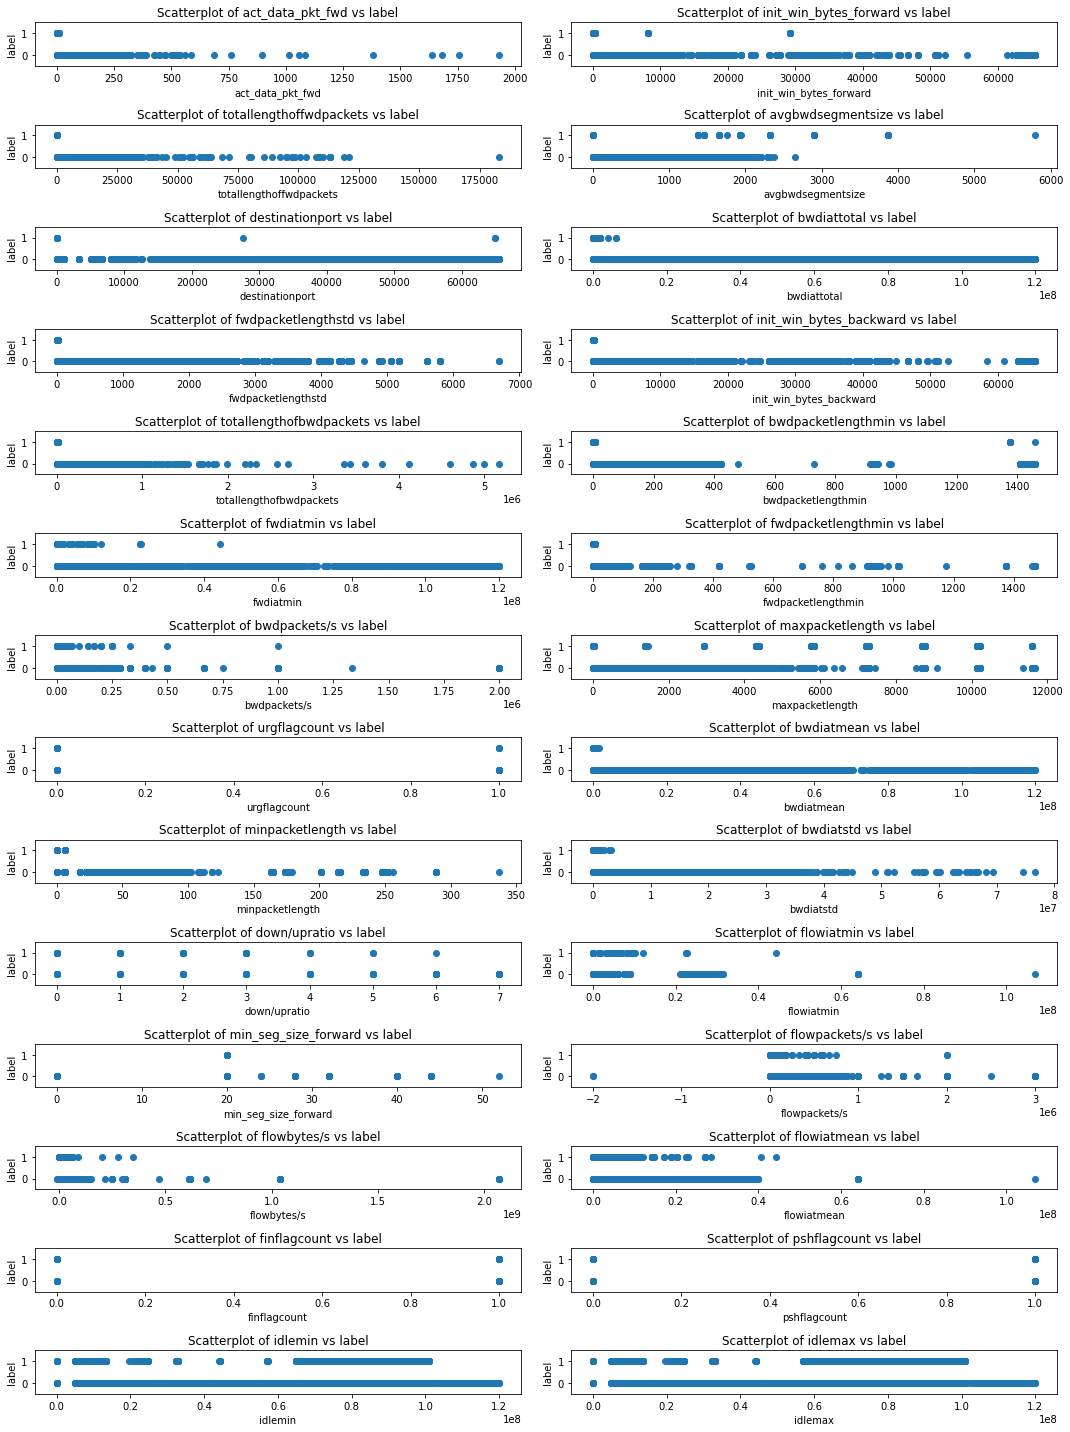

In [126]:
# Create subplots
features = df.columns.drop('label')
num_features = len(features)

fig, axs = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, 20))  # Increased figure height

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Create scatterplots
for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df['label'])
    axs[i].set_title(f'Scatterplot of {feature} vs label')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('label')
    axs[i].set_ylim([-0.5, 1.5])  # Adjust y-axis limits to provide more vertical space

# Remove any empty subplots
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [127]:
# Separate features and label
features = df.drop('label', axis=1)
label = df['label']

# Standard Scaling (mean = 0, std = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Normalization (range 0 to 1)
normalizer = StandardScaler()
normalized_features = normalizer.fit_transform(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the label column back to the scaled and normalized DataFrames
scaled_df['label'] = label.values
normalized_df['label'] = label.values

In [128]:
# Display the results
print("Scaled DataFrame (Standard Scaling):")
scaled_df.head()

Scaled DataFrame (Standard Scaling):


,act_data_pkt_fwd,init_win_bytes_forward,totallengthoffwdpackets,avgbwdsegmentsize,destinationport,bwdiattotal,fwdpacketlengthstd,init_win_bytes_backward,totallengthofbwdpackets,bwdpacketlengthmin,fwdiatmin,fwdpacketlengthmin,bwdpackets/s,maxpacketlength,urgflagcount,bwdiatmean,minpacketlength,bwdiatstd,down/upratio,flowiatmin,min_seg_size_forward,flowpackets/s,flowbytes/s,flowiatmean,finflagcount,pshflagcount,idlemin,idlemax,label
0,-0.18840810,-0.52435981,-0.28544964,-0.79498298,2.32829593,-0.29863037,-0.26952947,-0.13938317,-0.15199379,-0.33162875,-0.05464309,-0.13399270,-0.08252042,-0.84456960,-0.40476006,-0.20663573,-0.13147696,-0.29410281,-0.70303302,-0.03700626,-0.35579937,5.66813993,0.20222141,-0.58511623,-0.05154070,-0.73575929,-0.39110528,-0.47840805,0
1,-0.26990196,-0.52485745,-0.28729601,-0.78962776,2.33786459,-0.29863037,-0.26952947,-0.07986306,-0.15184081,-0.21258792,-0.05464388,-0.13399270,0.37856102,-0.84456960,2.47059948,-0.20663573,-0.13147696,-0.29410281,-0.00414605,-0.03686677,-0.35579937,0.03568444,-0.02814857,-0.58507699,-0.05154070,-0.73575929,-0.39110528,-0.47840805,0
2,-0.26990196,-0.52485745,-0.28729601,-0.78962776,2.33791522,-0.29863037,-0.26952947,-0.07986306,-0.15184081,-0.21258792,-0.05464388,-0.13399270,0.88397725,-0.84456960,2.47059948,-0.20663573,-0.13147696,-0.29410281,-0.00414605,-0.03694178,-0.35579937,0.21042137,-0.02100175,-0.58509809,-0.05154070,-0.73575929,-0.39110528,-0.47840805,0
3,-0.26990196,-0.52460863,-0.28729601,-0.78962776,1.89142823,-0.29863037,-0.26952947,-0.06295657,-0.15184081,-0.21258792,-0.05464388,-0.13399270,1.39565250,-0.84456960,2.47059948,-0.20663573,-0.13147696,-0.29410281,-0.00414605,-0.03696547,-0.35579937,0.38732220,-0.01376642,-0.58510475,-0.05154070,-0.73575929,-0.39110528,-0.47840805,0
4,-0.18840810,-0.52448422,-0.28544964,-0.79498298,2.32819467,-0.29863037,-0.26952947,-0.13938317,-0.15199379,-0.33162875,-0.05464309,-0.13399270,-0.08252042,-0.84456960,-0.40476006,-0.20663573,-0.13147696,-0.29410281,-0.70303302,-0.03700626,-0.35579937,5.66813993,0.20222141,-0.58511623,-0.05154070,-0.73575929,-0.39110528,-0.47840805,0


In [129]:
df = scaled_df.copy()

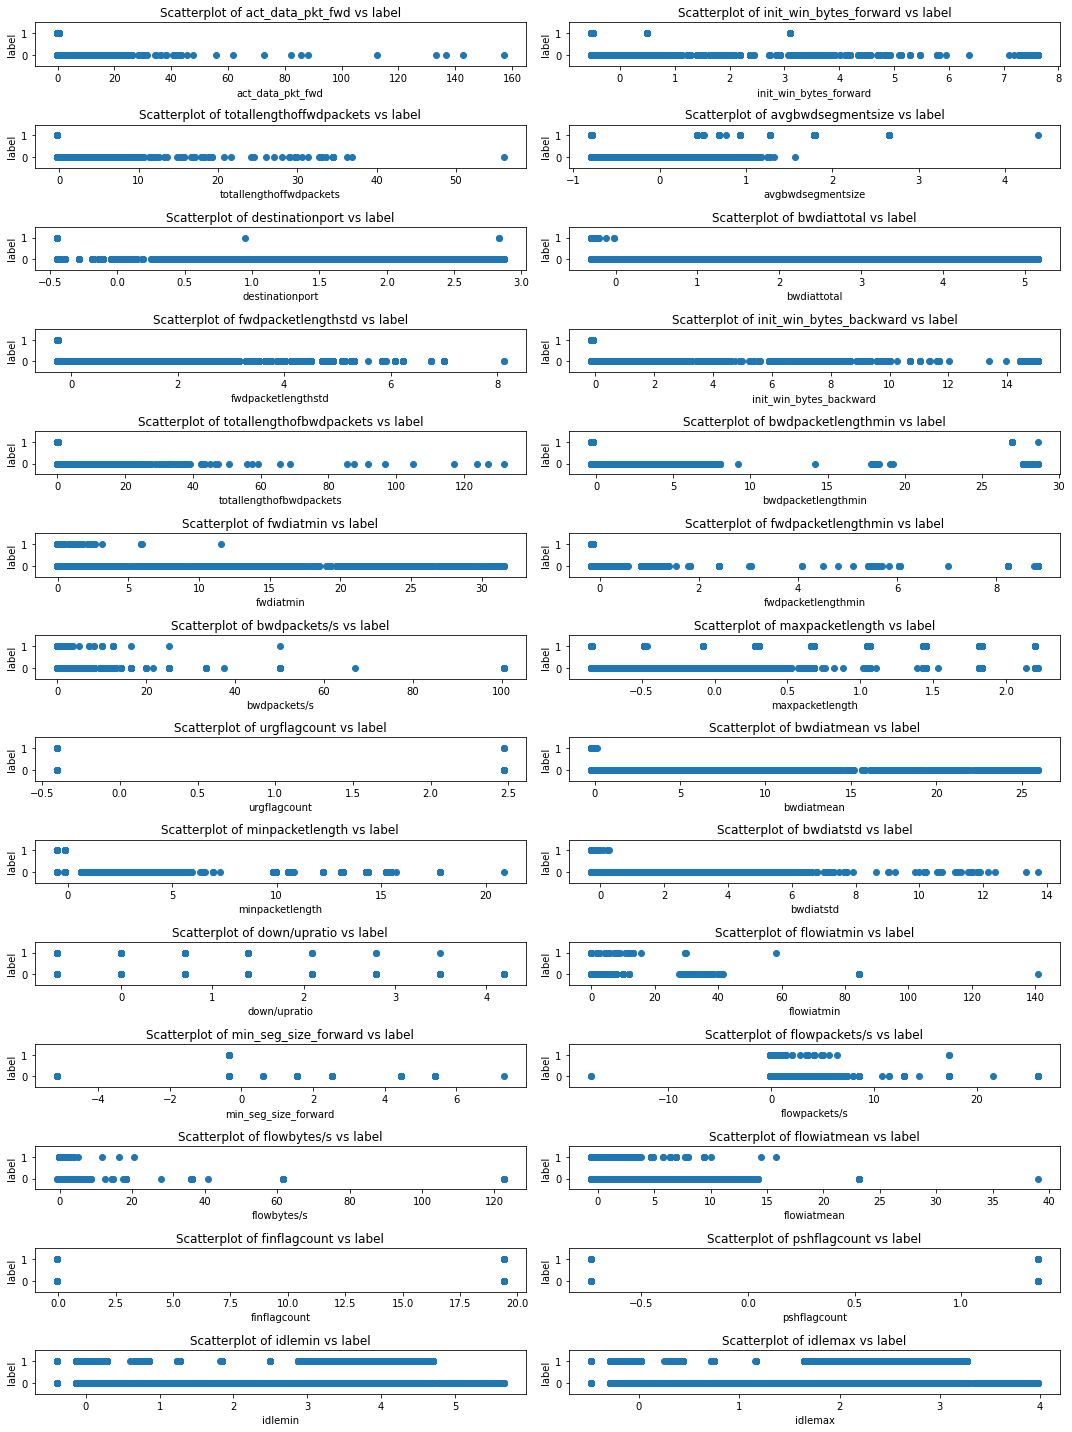

In [130]:
# Create subplots
features = df.columns.drop('label')
num_features = len(features)

fig, axs = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, 20))  # Increased figure height

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Create scatterplots
for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df['label'])
    axs[i].set_title(f'Scatterplot of {feature} vs label')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('label')
    axs[i].set_ylim([-0.5, 1.5])  # Adjust y-axis limits to provide more vertical space

# Remove any empty subplots
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [131]:
df.to_csv('filtered_normalized_csv.csv',index=False)